Goals of this notebook. Take our best model file:

* plot weights
* look at number of parameters
* ...

In [1]:
import pylearn2.utils
import pylearn2.config
import theano
import neukrill_net.dense_dataset
import neukrill_net.utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hl
%load_ext holoviews.ipython
import sklearn.metrics

Using gpu device 0: Tesla K40c
:0: FutureWarning: IPython widgets are experimental and may change in the future.


Welcome to the HoloViews IPython extension! (http://ioam.github.io/holoviews/)
Available magics: %compositor, %opts, %params, %view, %%labels, %%opts, %%view


At the time of writing our best model is defined by the run settings file `alexnet_based_40aug.json`, basically taking the AlexNet based architecture with an extra convolutional layer and using more augmentation. Full details are in the following YAML file:

In [2]:
cd ..

/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-work


In [4]:
cat yaml_templates/alexnet_based_extra_convlayer.yaml

!obj:pylearn2.train.Train {
    dataset: &train !obj:neukrill_net.dense_dataset.DensePNGDataset {
        settings_path: %(settings_path)s,
        run_settings: %(run_settings_path)s,
        training_set_mode: "train"
    },
    model: !obj:pylearn2.models.mlp.MLP {
        batch_size: &batch_size 128,
        input_space: !obj:pylearn2.space.Conv2DSpace {
            shape: %(final_shape)s,
            num_channels: 1,
            axes: ['c', 0, 1, 'b'],
        },
        layers: [ !obj:pylearn2.models.mlp.ConvRectifiedLinear {
                     layer_name: h1,
                     output_channels: 48,
                     irange: .025,
                     init_bias: 0,
                     kernel_shape: [8, 8],
                     pool_shape: [2, 2],
                     pool_stride: [2, 2],
                     max_kernel_norm: 1.9365
                 },!obj:pylearn2.models.mlp.ConvRectifiedLinear {
                     layer_name: h2,
                     output_channels: 9

It has relatively few MLP layers, so maybe we should look at where the parameters in our model are distributed; comparing the MLP layers to the convolutional ones.

In [7]:
settings = neukrill_net.utils.Settings("settings.json")
run_settings = neukrill_net.utils.load_run_settings(
    "run_settings/alexnet_based_40aug.json", settings, force=True)

In [8]:
model = pylearn2.utils.serial.load(run_settings["pickle abspath"])

In [9]:
params = model.get_params()

In [14]:
params[0].name

'h1_W'

In [25]:
total_params = sum(map(lambda x: x.get_value().size,params))
print("Total parameters: {0}".format(total_params))

Total parameters: 9370057


In [16]:
for l in params:
    print("Layer {0}: {1} parameters".format(l.name,l.get_value().size))

Layer h1_W: 3072 parameters
Layer h1_b: 80688 parameters
Layer h2_W: 115200 parameters
Layer h2_b: 27744 parameters
Layer h3_W: 110592 parameters
Layer h3_b: 15488 parameters
Layer h4_W: 221184 parameters
Layer h4_b: 32448 parameters
Layer h5_W: 221184 parameters
Layer h5_b: 28800 parameters
Layer h6_W: 8388608 parameters
Layer h6_b: 1024 parameters
Layer softmax_b: 121 parameters
Layer softmax_W: 123904 parameters


In [19]:
for l in params:
    print("Layer {0}: {1}% of the parameters.".format(l.name,
                        100*(float(l.get_value().size)/total_params)))

Layer h1_W: 0.0327852861514% of the parameters.
Layer h1_b: 0.861126031571% of the parameters.
Layer h2_W: 1.22944823068% of the parameters.
Layer h2_b: 0.296092115555% of the parameters.
Layer h3_W: 1.18027030145% of the parameters.
Layer h3_b: 0.165292484347% of the parameters.
Layer h4_W: 2.3605406029% of the parameters.
Layer h4_b: 0.346294584974% of the parameters.
Layer h5_W: 2.3605406029% of the parameters.
Layer h5_b: 0.307362057669% of the parameters.
Layer h6_W: 89.5256880508% of the parameters.
Layer h6_b: 0.0109284287171% of the parameters.
Layer softmax_b: 0.00129134753396% of the parameters.
Layer softmax_W: 1.32233987477% of the parameters.


So most of the parameters are in the weight matrix for layer 6? That's probably not a good idea.

Receptive Fields/Kernels
========

Looking at the Kernels we've learnt using the script provided by Pylearn2.

In [6]:
%env PYLEARN2_VIEWER_COMMAND=/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-work/image_hack.sh

env: PYLEARN2_VIEWER_COMMAND=/afs/inf.ed.ac.uk/user/s08/s0805516/repos/neukrill-net-work/image_hack.sh


In [16]:
%run ~/repos/pylearn2/pylearn2/scripts/show_weights.py /disk/scratch/neuroglycerin/models/continue_rep8aug_allrotations_recent.pkl

making weights report
loading model
loading done
smallest enc weight magnitude: 8.39699077915e-06
mean enc weight magnitude: 0.0909020677209
max enc weight magnitude: 1.08618330956


In [17]:
from IPython.display import Image

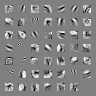

In [18]:
def plot_recent_pylearn2():
    pl2plt = Image(filename="/afs/inf.ed.ac.uk/user/s08/s0805516/tmp/pylearnplot.png", width=500)
    return pl2plt
plot_recent_pylearn2()

In [23]:
%run ~/repos/pylearn2/pylearn2/scripts/show_weights.py /disk/scratch/neuroglycerin/models/replicate_8aug.pkl

making weights report
loading model
loading done
smallest enc weight magnitude: 4.82278937852e-06
mean enc weight magnitude: 0.0964648425579
max enc weight magnitude: 1.09708678722


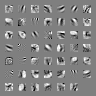

In [24]:
plot_recent_pylearn2()

I think that's just the weights from the kernels in the first layer. The script is not specific about it though.